# Travis CI

## Continuous Integration (CI) y Continuous Delivery (CD)

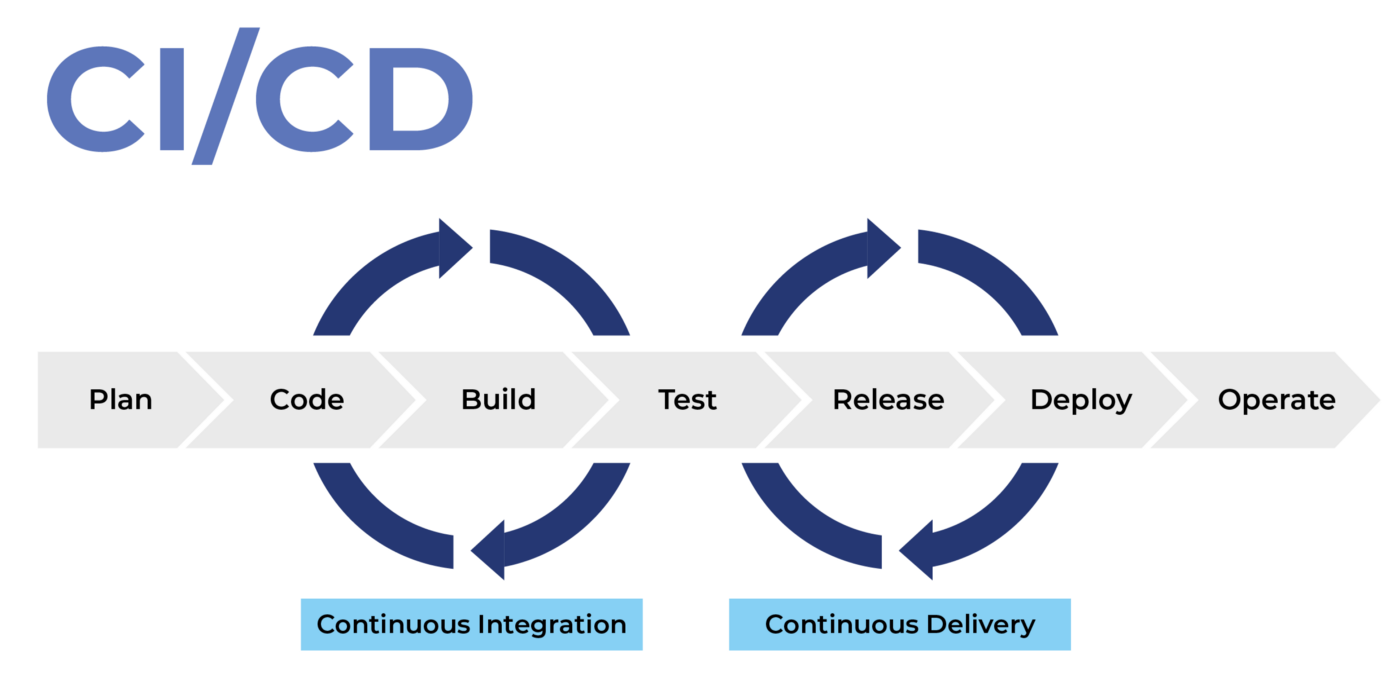

### CI

Planear, hacer codigo y pruebas sin generar errores al agregar mas features

### CD

Despues de pasar el CI tener un release para realizar deploy

## Travis-ci.org

Es necesario tener cuenta en Github, ya que solo trabaja con github para la version gratuita, ademas los repositorios deben ser proyectos open source.

Para usarlo con un repositorio privado debera ser pago, se usa a traves de **travis-ci.com**

## .travis.yml

El archivo **.travis.yml** es necesario agregarlo en el proyecto para su configuracion con travis.

```yaml
# java, ruby, python, node_js
language: node_js

# os: osx, by default GNU/Linux

git:
  # 3 niveles de git anteriores
  depth:3

branches:
  # branches que no queremos implementar o ser leidas
  except:
  - legacy
  - experimental

branches:
  # solo las ramas que queremos
  only:
  - master
  - stable

before_install:
  # php, python, etc
  - python

install:
  - yarn install
  - apt install curl

script:
  - yarn deploy
  - yarn test

before_script:
  - yarn test

after_script:
  - yarn clean

# Cachear dentro de los proyectos, recursos que no se van a necesitar siempre
cache:
  directories:
    - node_modules # mantener en cache node_modules
    
jobs:
  include:
    - stage: test
      script: yarn test
      script: yarn eslint
    - stage: deploy
      script: yarn deploy

# deploy github page, heroku, aws
deploy:
  provider: heroku # Donde va a ser el deploy
  on
    repo: [Github User]/[Project Name]
```

## Configuracion de Proyecto en React

```yml
language: node_js

cache:
  directories:
    - node_modules
    - ~/.npm

# Version de Node
node_js:
  -'12'

git:
  depth:3

script:
  # por defecto yarn hace yarn install
  # la configuracion de travis tiene yarn
  - yarn build

deploy:
  # github pages
  provider: pages
  skip-cleanup:true
  keep-history:true
  # Para conectarnos con el repositorio
  github-token: $GITHUB_TOKEN
  local-dir: dist/
  target-branch: gh-pages
  commit_message:"deploy on project"
  on:
    branch: master
```

En las configuraciones del proyecto desde travis-ci se debe activar y realizar las configuraciones necesarias, en el ejemplo anterior se uso una variable de entorno `$GITHUB_TOKEN` esta debe ser agregada en los settings.

Tambien se puede hacer uso de cron jobs.

### Crear token

- Ir a Github
- Settings
- Develoepr Settings
- Personal Access Token

    - Para el ejemplo anterior dar permisos sobre:
        - repo
        - repo_hook

- Generar token (Se debe guardar seguro)

Para ejecutar por primera vez:
- Pull requests
- More options
- Trigger Build

## Integracion con notificaciones de correo electronico

Se debe agregar un codigo como el siguiente en el archivo travis.yml antes del deploy.

```yml
# manda emails a esos mails cuando es exitoso y cuando falla

notifications:
  email:
    reciepients:
    - [email]@[Dominio].com
    on_success: always
    on_failure: always
```

## Integracion con notificaciones de Slack

Se debe instalar la App de travis en slack

```yml
notifications:
  slack: Token generado desde la aplicacion de slack
  # ...
```

## Configuracion de Proyecto NodeJS (Heroku)

- Crear nueva aplicacion en Heroku
- Conectar con Github
- Activar (Wait for CI to pass ...)
- Activar la opcion (Automatic Deploys)

```yml
language: node_js

cache:
  directories:
    - node_modules
    - ~/.npm

node_js:
  - '12'

git:
  depth: 3

script:
  - yarn test

notifications:
  slack: workspace:token
  email:
    reciepients:
      - [Email]@[Dominio].com
    on_success: always
    on_failure: always

deploy:
  provide: heroku
  skip-cleanup: true
  keep-history: true
  api_key: apiKey # Creada desde heroku
  app: [Nombre de la app creada en Heroku]
  on:
    repo: [Github User]/[Project Name]
```

El Api Key se obtiene

- Configuraciones de la cuenta
- Obtener el Api Key

## Instalar Travis CLI (Command Line Client)

Para poder utilizar Travis CI CLI es necesario contar con Ruby en tu sistema operativo.

Ahora que ya tienes instalado Ruby en tu sistema operativo vamos a proceder a instalar el cliente de línea de comandos de Travis, con el cual podemos realizar tareas específicas que nos ayuden a ser más efectivos con el uso de esta herramienta.

Para garantizar que tenemos instalado Ruby, debemos ejecutar el comando y comprobar que tenemos una versión superior a 1.9.3

`ruby -v`

Ahora lo que debemos instalar es el cliente que está disponible como una gema de Ruby y debemos de ejecutar el siguiente comando:

`gem install travis`

Una vez que la instalación se ha realizado debemos controlar que tenemos Travis instalado con el siguiente comando:

`travis version`

Si quieres aprender más acerca del "Command Line Client" que implementa Travis CI te invito a revisar el repositorio del proyecto. The [Travis Client](https://github.com/travis-ci/travis.rb)

## Seguridad

En este curso utilizamos información sensible que deberíamos ocultar. Para eso travis-cli nos ofrece el siguiente comando:

`travis encrypt tu_clave`

para encriptar tu información sensible y que solo travis pueda entender.

Luego de ejecutar este comando, travis genera lo siguiente

`secure:"..."`

luego eso lo integrarias de la siguiente manera

```yml
# ejemplo con api key
api_key:
	secure:"..."
```
y de esa manera aseguramos nuestras claves y/o información sensible.

[Mas informacion](https://docs.travis-ci.com/user/encryption-keys/)